# **Jour 43 : MTCARS** 


La base de données **mtcars** est un ensemble de données classiques en statistique et en science des données. Elle provient de la revue Motor Trend US de 1974 et contient des informations sur 32 modèles de voitures. Chaque observation correspond à un modèle de voiture et comprend 11 variables décrivant ses caractéristiques techniques et ses performances. L’objectif de cette analyse est de mieux comprendre les relations entre les **caractéristiques des véhicules** et leur **consommation en carburant (mpg)**. 

$\bigoplus$ **Signification des variables**

+ mpg : Miles per gallon (consommation en miles par gallon, indicateur d’efficacité énergétique).
+ cyl : Nombre de cylindres du moteur (4, 6 ou 8).
+ disp : Cylindrée du moteur en pouces cubes.
+ hp : Puissance du moteur (horsepower, chevaux-vapeur).
+ drat : Ratio du pont arrière (rear axle ratio).
+ wt : Poids du véhicule (en 1000 livres).
+ qsec : Temps au quart de mile (temps en secondes pour parcourir 1/4 de mile).
+ vs : Type de moteur (0 = moteur en V, 1 = moteur en ligne).
+ am : Type de transmission (0 = automatique, 1 = manuelle).
+ gear : Nombre de vitesses de la boîte de transmission.
+ carb : Nombre de carburateurs.

## 0.Chargement des librairies 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

## 1. Chargement de la base données

In [30]:
data = pd.read_csv("C:/Users/ZES/Downloads/mtcars.csv")

# les types de données
print(data.dtypes)

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object


In [31]:
print(data.head())
print(data.describe())

               model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  
             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.5

In [32]:
# Nous allons exclure la colonne des noms de voitures pour les analyses
df = data.select_dtypes(include=[np.number])

## 2. Analyse exploratoire des données

### 2.1. Visualisation des distributions des variables 

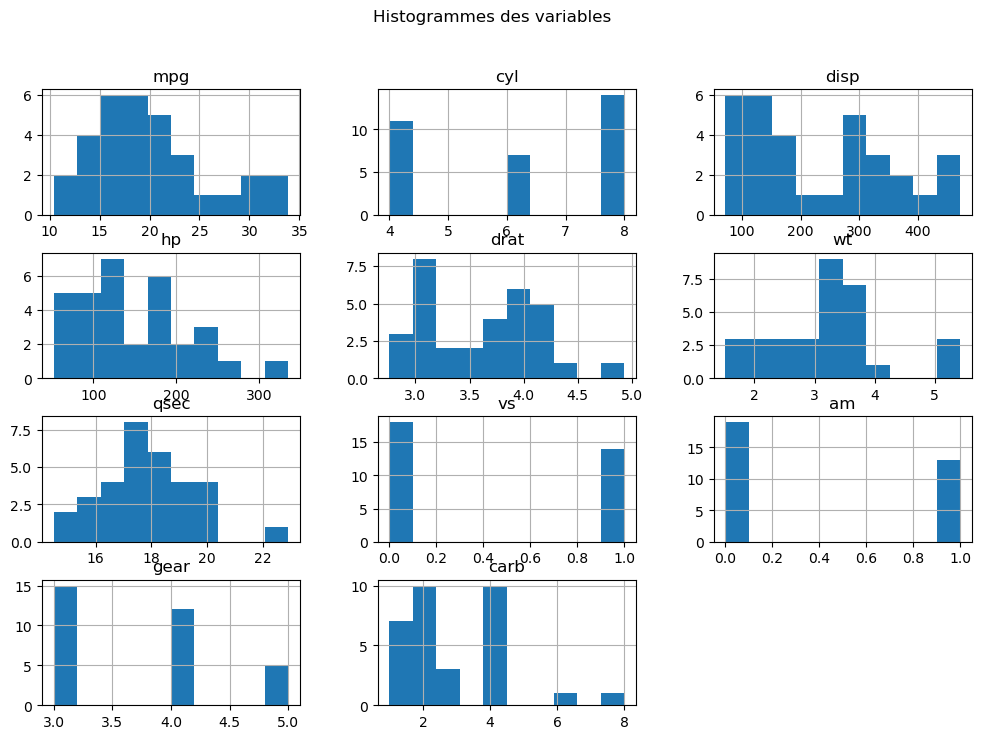

In [33]:
# Histogrammes des variables
df.hist(figsize=(12, 8), bins=10)
plt.suptitle("Histogrammes des variables")
plt.show()

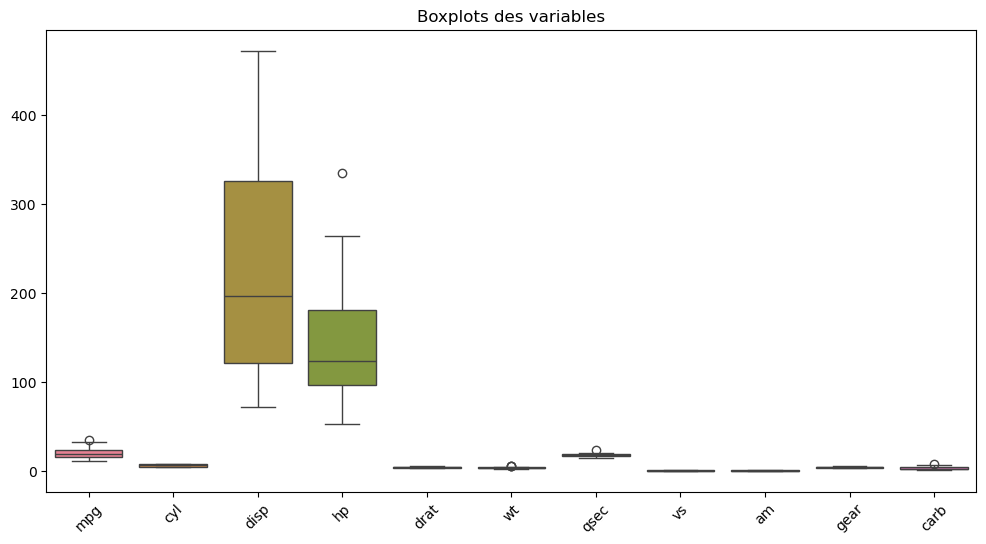

In [34]:
# Boxplots des variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots des variables")
plt.show()


### 2.2. Analyse des corrélations

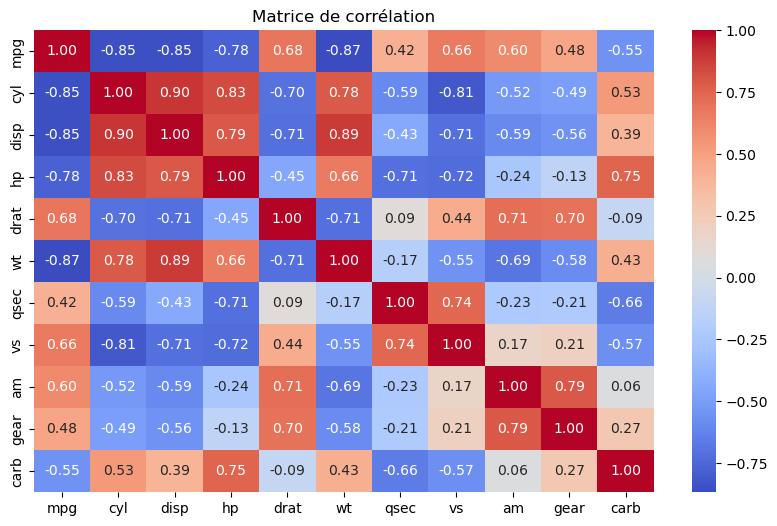

In [35]:
# Matrice de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


### 2.3. Analyse de quelques relations entre variables 

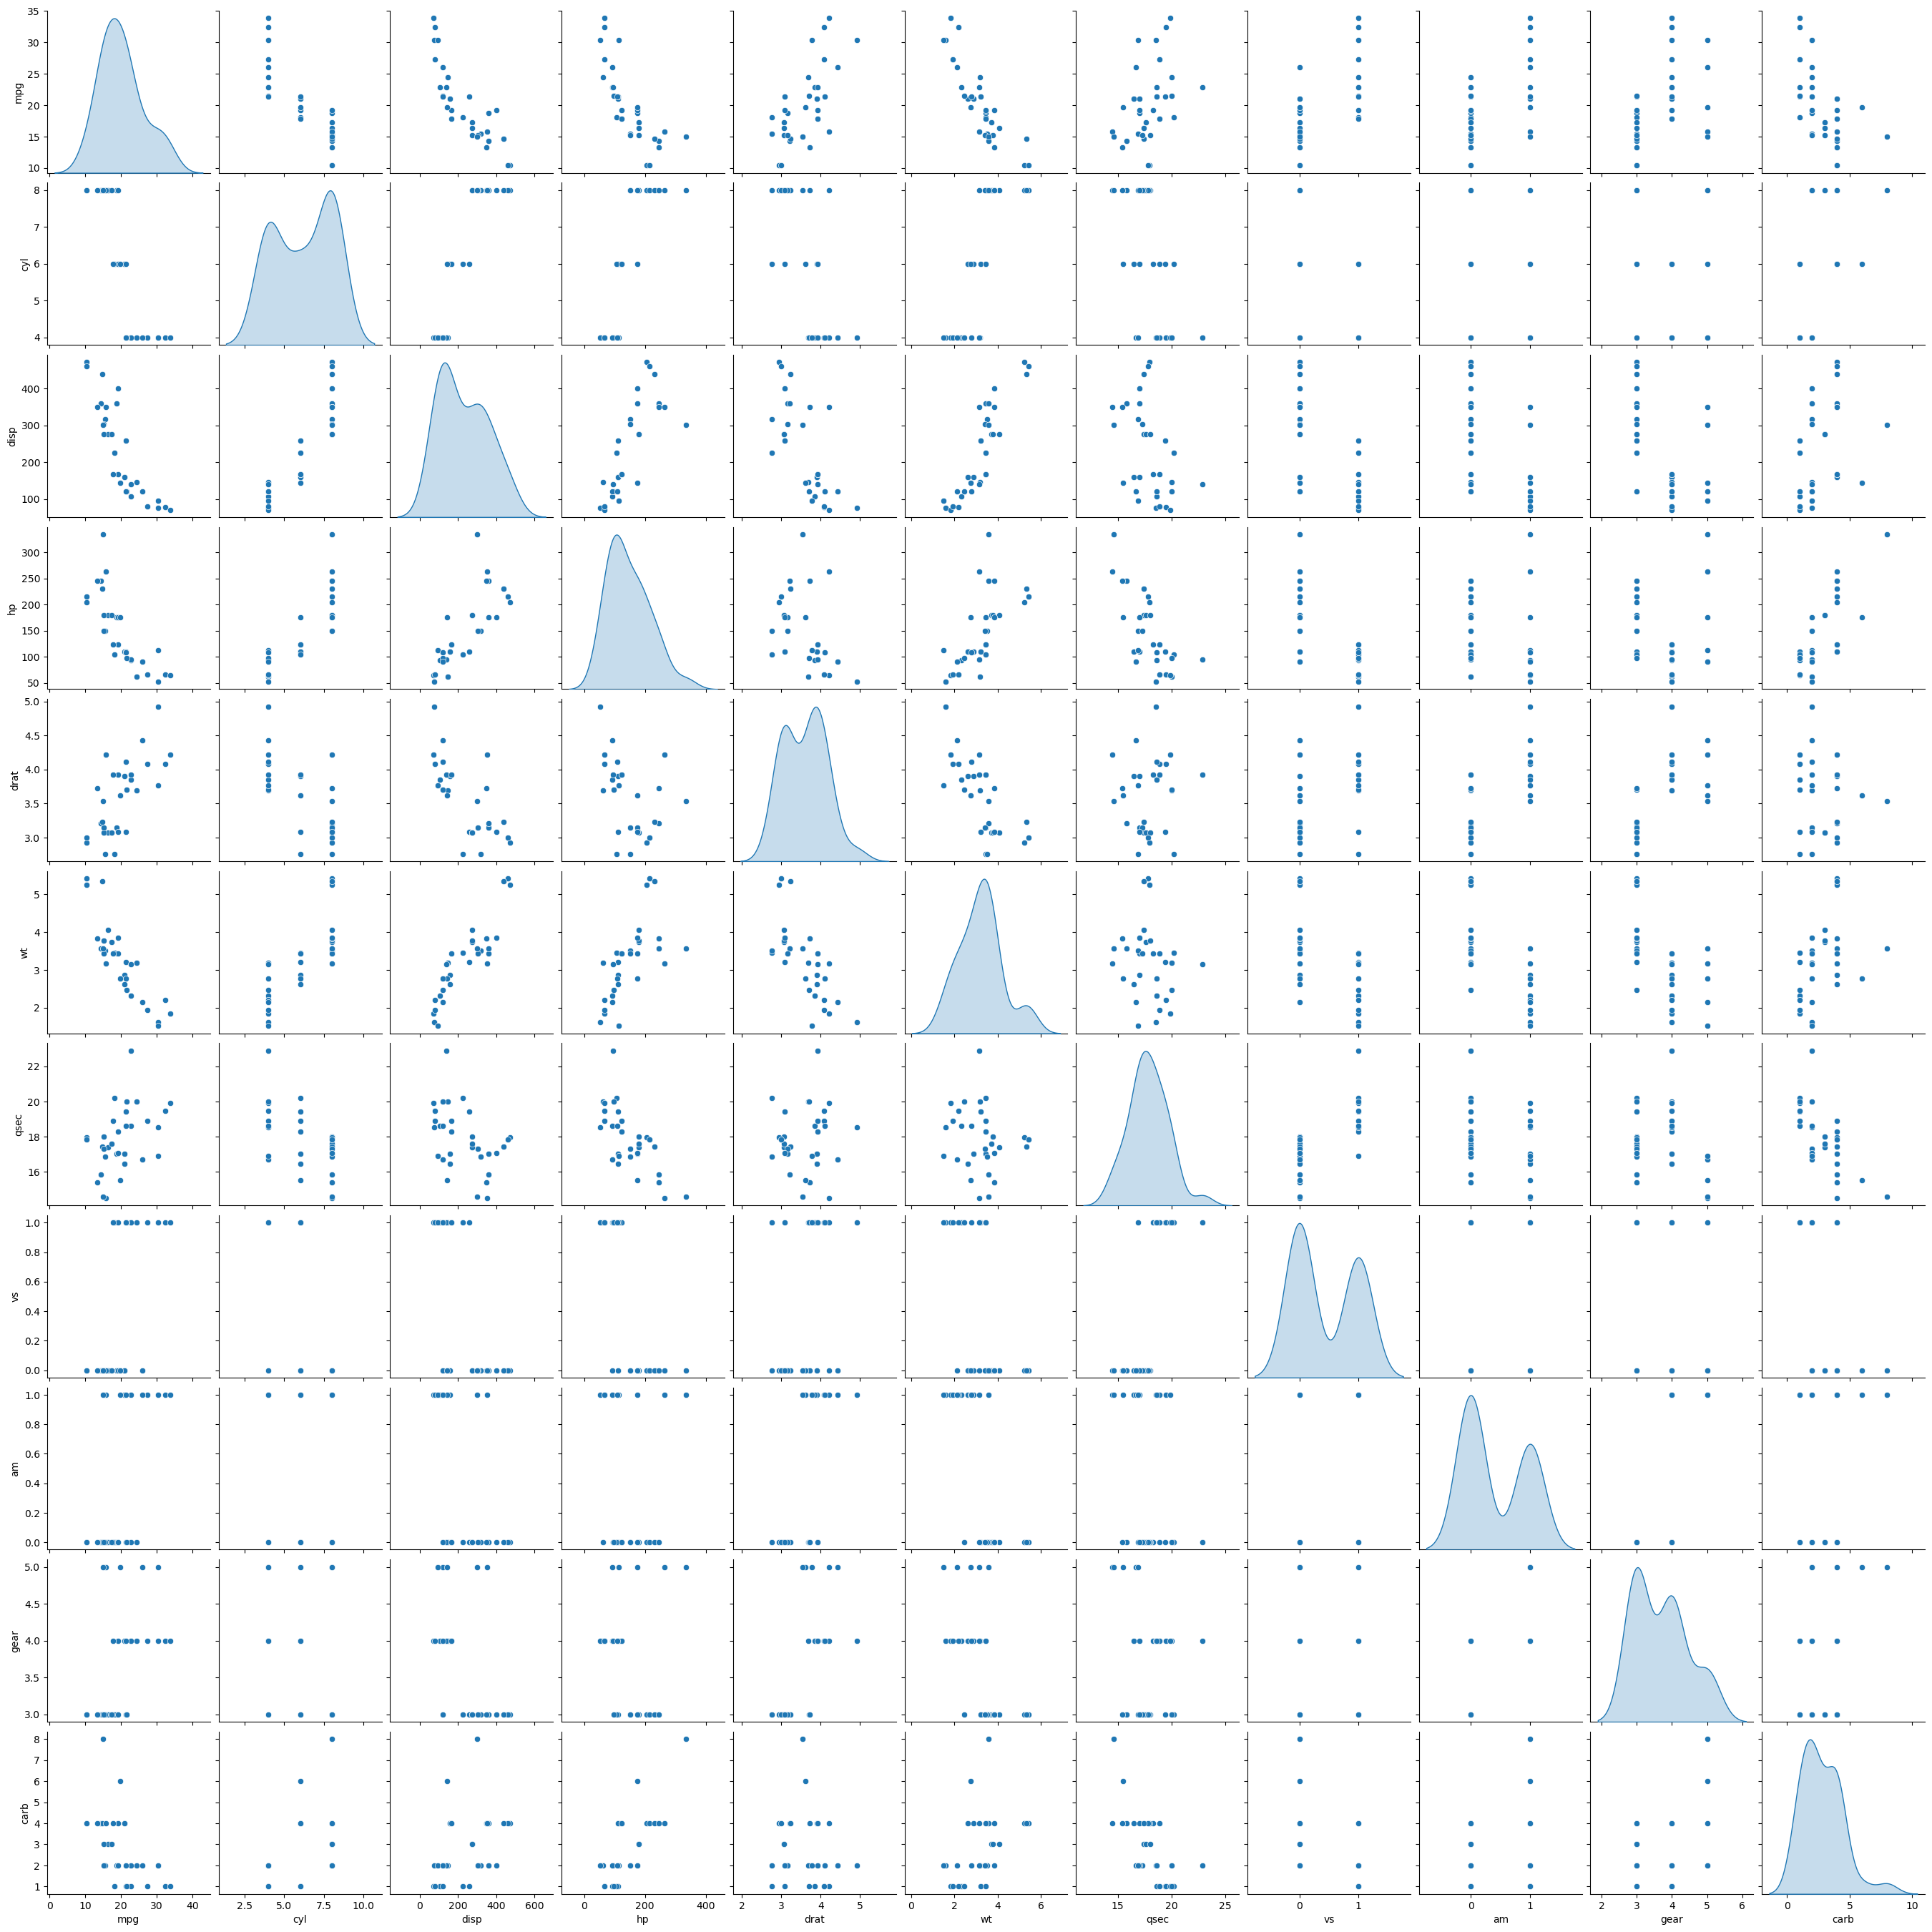

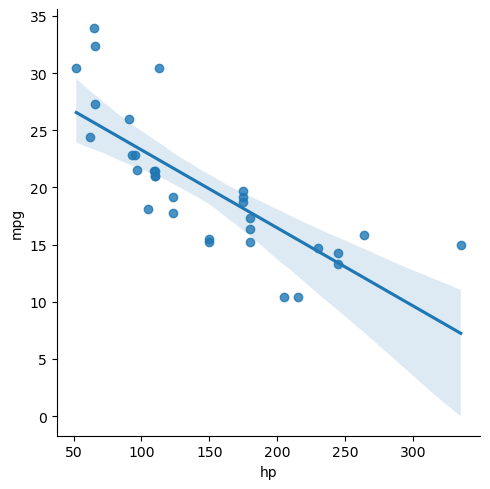

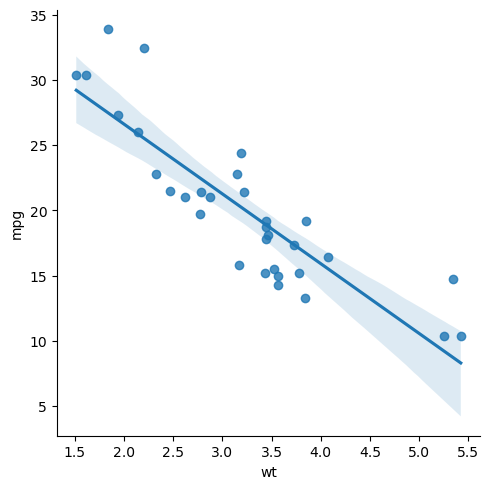

In [36]:
# Pairplot des variables principales
sns.pairplot(df, diag_kind="kde")
plt.show()

# Relation entre mpg et d'autres variables
sns.lmplot(x="hp", y="mpg", data=df)
sns.lmplot(x="wt", y="mpg", data=df)


## 3. Analyse de la régression multiple

In [37]:
# les variables explicatives (X) et la variable cible (y)
X = df.drop(columns=["mpg"])  
y = df["mpg"]

# La constante pour l'intercept
X = sm.add_constant(X)

# Ajuste le modèle
model = sm.OLS(y, X).fit()

# Résumé du modèle
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           3.79e-07
Time:                        12:39:50   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.5

In [38]:
# Sélection des variables pertinentes par la Régression pas à pas (Backward Elimination)
import statsmodels.api as sm

def backward_elimination(data, target, significance_level=0.05):
    X = data.copy()
    X = sm.add_constant(X)  
    y = target
    model = sm.OLS(y, X).fit()
    
    while True:
        p_values = model.pvalues.drop("const")  
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            feature_to_remove = p_values.idxmax()
            X.drop(columns=[feature_to_remove], inplace=True)
            model = sm.OLS(y, X).fit()
        else:
            break

    return model

# Application de l'élimination pas à pas
final_model = backward_elimination(df.drop(columns=["mpg"]), df["mpg"])
print(final_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.75
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           1.21e-11
Time:                        12:39:50   Log-Likelihood:                -72.060
No. Observations:                  32   AIC:                             152.1
Df Residuals:                      28   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6178      6.960      1.382      0.1

## 4. Vérification des hypothèses 

### 4.1. Test de Normalité des erreurs

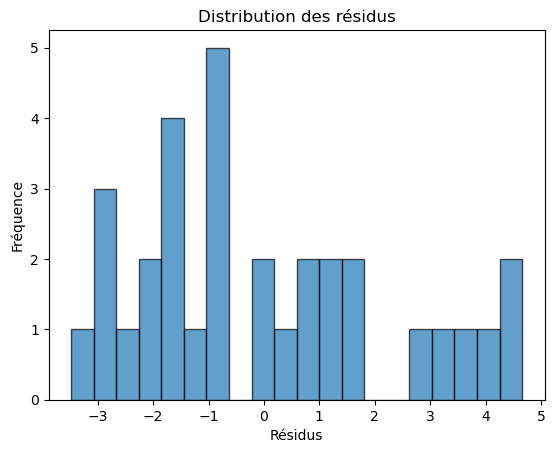

Test de Shapiro-Wilk: ShapiroResult(statistic=0.9410960255551162, pvalue=0.08042769363003151)


In [39]:
residuals = final_model.resid
from scipy.stats import shapiro

# Histogramme des résidus
plt.hist(residuals, bins=20, edgecolor="black", alpha=0.7)
plt.title("Distribution des résidus")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()

# Test de normalité de Shapiro-Wilk
print("Test de Shapiro-Wilk:", shapiro(residuals))


 La p-valeur du test de **Shapiro-Wilk** (0,0804) est > 0.05, alors les résidus suivent une loi normale.

### 4.2. Homoscédasticité (test de Breusch-Pagan)

In [40]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, final_model.model.exog)
print(f"Test de Breusch-Pagan:, p-value={bp_test[1]:.3f}")


Test de Breusch-Pagan:, p-value=0.103


 Les résidus sont homoscédastiques (variance constante) car la p-valeur est >0,05

## 5. Prédiction et évaluation du modèle

In [41]:
# Prédictions
df["mpg_pred"] = final_model.predict(sm.add_constant(df.drop(columns=["mpg"])))

# Graphique des valeurs réelles vs. prédites
plt.scatter(df["mpg"], df["mpg_pred"], alpha=0.7)
plt.plot([df["mpg"].min(), df["mpg"].max()], [df["mpg"].min(), df["mpg"].max()], color="red", linestyle="--")
plt.xlabel("MPG Réel")
plt.ylabel("MPG Prédit")
plt.title("MPG Réel vs. Prédit")
plt.show()


ValueError: shapes (32,11) and (4,) not aligned: 11 (dim 1) != 4 (dim 0)

In [ ]:
print(X.shape)  # Matrice de taille (32, 11)
print(y.shape)  # Vecteur ou matrice de taille (4,)


(32, 11)
(32,)
